In [74]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('pl_PL')
Faker.seed(0)
np.random.seed(0)
random.seed(0)

T0_date = datetime.strptime('2015-01-01', '%Y-%m-%d').date() 
T1_date = datetime.strptime('2020-01-01', '%Y-%m-%d').date() 
T2_date = datetime.strptime('2025-01-01', '%Y-%m-%d').date()  

#To generate 1 milion houses, wit buying and selling set it to 
SCALE = 1
SCALE = 4000

In [75]:
def push_to_file(file_name, data):
    with open(file_name, 'w') as file:
        for row in data:
            line = '|'.join(str(value) for value in row)
            file.write(line + '\n')

In [76]:
NUM_PEOPLE_T1 = 20 * SCALE 
NUM_PEOPLE_T2 = 40 * SCALE

def write_person(file, PersonID, name, surname, phone_number, emai, addres):
    line = f"{PersonID}|{name}|{surname}|{phone_number}|{emai}|{addres}\n"
    file.write(line)


with open('T1_person.bulk', 'w') as t1_file, open('T2_person.bulk', 'w') as t2_file:
    for i in range(NUM_PEOPLE_T2):
        if i < NUM_PEOPLE_T1:
            write_person(t1_file,
                            i+1,
                            fake.first_name(), 
                            fake.last_name(), 
                            str(random.randint(100000000, 999999999)),
                            fake.email(), 
                            fake.address().replace('\n', ', '))

        write_person(t2_file,
                        i+1, 
                        fake.first_name(), 
                        fake.last_name(), 
                        str(random.randint(100000000, 999999999)),
                        fake.email(), 
                        fake.address().replace('\n', ', '))   


In [77]:
NUM_EMPLOYEES_T1 = int(NUM_PEOPLE_T1 / 5)
NUM_EMPLOYEES_T2 = int(NUM_PEOPLE_T2 / 5)

NUM_OF_CLIENTS_AT_THAT_TIME = 0

#employees = []
salesman_t1 = []
salesman_t2 = []

def write_employee(file, employee_id, person_id, title, salary):
    line = f"{employee_id}|{person_id}|{title}|{salary}\n"
    file.write(line)

with open('T1_employees.bulk', 'w') as t1_file, open('T2_employees.bulk', 'w') as t2_file:
    for i in range(NUM_EMPLOYEES_T2):
        if NUM_EMPLOYEES_T1 == i :
            NUM_OF_CLIENTS_AT_THAT_TIME = NUM_PEOPLE_T1 - NUM_EMPLOYEES_T1

        EmployeeID = i + 1 
        PersonID = i + 1 + NUM_OF_CLIENTS_AT_THAT_TIME
        title = random.choice(['Salesman', 'Manager', 'HR', 'Accountant', 'IT'])
        salary = round(random.uniform(30000, 80000))

        if i == 0:
            title = 'Salesman'
        
        if title == 'Salesman':
            if i < NUM_EMPLOYEES_T1:
                salesman_t1.append(EmployeeID)
            
            salesman_t2.append(EmployeeID)

        if i < NUM_EMPLOYEES_T1:
            write_employee(t1_file, EmployeeID, PersonID, title, salary)

        write_employee(t2_file, EmployeeID, PersonID, title, salary)


In [78]:
NUM_PROPERTIES_T1 = 100 * SCALE
NUM_PROPERTIES_T2 = 200 * SCALE
price_list = []
amenities_list = [
    "WiFi", "Parking", "Balcony", "Garden", "Air Conditioning", 
    "Heating", "Fireplace", "Swimming Pool", "Dishwasher", 
    "Washer", "Dryer", "Elevator", "Gym", "Pet Friendly"
]

def write_property(file, PropertyID, Ammentities, Address, Type, price):
    line = f"{PropertyID}|{Ammentities}|{Address}|{Type}|{price}\n"
    file.write(line)

with open('T1_property.bulk', 'w') as t1_file, open('T2_property.bulk', 'w') as t2_file:
    for i in range(NUM_PROPERTIES_T2):
        price = round(random.uniform(100000, 1000000))
        price_list.append(price)
        if i < NUM_PROPERTIES_T1:
            write_property(t1_file,
                         i+1, 
                        ', '.join(random.sample(amenities_list, k=random.randint(3, 6))),
                        fake.address().replace('\n', ', '),
                        random.choice(['House', 'Apartment']),
                        price)

        write_property(t2_file,
                     i+1, 
                    ', '.join(random.sample(amenities_list, k=random.randint(3, 6))),
                     fake.address().replace('\n', ', '),
                    random.choice(['House', 'Apartment']),
                    price)


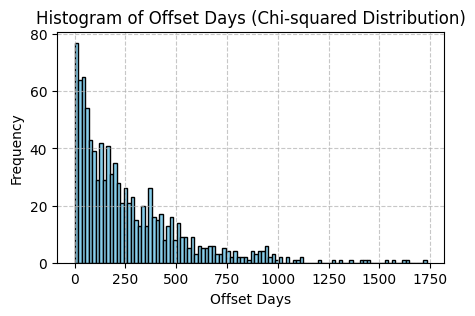

In [79]:
import matplotlib.pyplot as plt

starting_period = T0_date
ending_period = T1_date - timedelta(days=1)

df = 3 
num_simulations = 1000
offsets = []

for _ in range(num_simulations):
    buy_date = fake.date_between(start_date=starting_period, end_date=ending_period)
    date_range_days = (ending_period - buy_date).days

    if date_range_days <= 0:
        offsets.append(0)
        continue
    
    chi2_sample = min(np.random.chisquare(df) / 10, 1.0)
    offset_days = int(chi2_sample * date_range_days)
    offsets.append(offset_days)

# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(offsets, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Offset Days (Chi-squared Distribution)')
plt.xlabel('Offset Days')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
del offsets

In [80]:

import os

for file in ['T1_marketing.bulk', 'T2_marketing.bulk']:
    if os.path.exists(file):
        os.remove(file)


Methods_used_to_market = [
    "Video", "Photos", "Social Media", "Email Marketing", "SEO", 
    "Content Marketing", "Influencer Marketing", "Paid Ads", 
    "SMS Marketing"
]


def Write_marketing(file, PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods):
    line = f"{PropertyID}|{Money_Marketing}|{Views_Our_Website}|{Views_Competition_Website}|{Money_Competition_Website}|{Views_Social_Media}|{Money_Social_Media}|{Starting_date}|{Ending_date}|{Methods}\n"
    file.write(line)

def Write_marketing_cases(PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods):
     with open('T1_marketing.bulk', 'a') as t1_file, open('T2_marketing.bulk', 'a') as t2_file:
        if ending_period < T1_date:
            Write_marketing(t1_file, PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods)
        
        Write_marketing(t2_file, PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods)
        

          

def Generate_Marketing_data(PropertyID, buy_date, sale_date):
    if sale_date < T2_date:
        Views_Our_Website = round(random.uniform(1000, 10000))
        Views_Competition_Website = round(random.uniform(1000, 50000))
        Money_Competition_Website = round(Views_Competition_Website * random.uniform(0.005, 0.05), 2)
        Views_Social_Media = round(random.uniform(10, 75000))
        Money_Social_Media = round(Views_Social_Media * random.uniform(0.0001, 0.05), 2)
        Starting_date = buy_date + timedelta(days=random.randint(1, 3))
        Ending_date = sale_date - timedelta(days=random.randint(2, 10))
        #Methods = random.choice(Methods_used_to_market, k=random.randint(3, 6))
        Methods = ', '.join(random.sample(Methods_used_to_market, k=random.randint(3, 6))),
        Money_Marketing = Money_Competition_Website + Money_Social_Media

        if Starting_date >= sale_date or Starting_date >= Ending_date or buy_date >= Ending_date:
            Write_marketing_cases(PropertyID, 0, Views_Our_Website, 0, 0, 0, 0, 0, 0, 0)
            # 0 means that no marketing was than and we promoted it only through our website
        else:
            Write_marketing_cases(PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods)

In [81]:
NUM_OF_ACQUISITIONS_T1 = NUM_PROPERTIES_T1
NUM_OF_ACQUISITIONS_T2 = NUM_PROPERTIES_T2

acq = []
sale_t1 = []
sale_t2 = []
saleID_count_T1 = 0
saleID_count_T2 = 0
starting_period = T0_date
ending_period = T1_date - timedelta(days=1)

employee_cout = NUM_EMPLOYEES_T1
people_count = NUM_PEOPLE_T1

range1 = range(NUM_EMPLOYEES_T1 + 1, NUM_PEOPLE_T1)  # inclusive
range2 = range(NUM_PEOPLE_T1 + (NUM_EMPLOYEES_T2 - NUM_EMPLOYEES_T1) + 1, NUM_PEOPLE_T2)  # inclusive
combined_ranges = list(range1)


with open('T1_acquisitions.bulk', 'w') as t1_acq_file, open('T2_acquisitions.bulk', 'w') as t2_acq_file:
    with open('T1_sale.bulk', 'w') as t1_sale_file, open('T2_sale.bulk', 'w') as t2_sale_file:
        
        def write_sale_or_acq(file, ID, PropertyID, FK_Person, FK_Employee, AgreedPrice, Date):
            line = f"{ID}|{PropertyID}|{FK_Person}|{FK_Employee}|{AgreedPrice}|{Date}\n"
            file.write(line)

        def save_sale(case, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate):
            global saleID_count_T1, saleID_count_T2
            if case == 1:
                saleID_count_T1 += 1
                write_sale_or_acq(t1_sale_file, saleID_count_T1, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)
            elif case == 2:
                saleID_count_T2 = saleID_count_T2 + 1
                write_sale_or_acq(t2_sale_file, saleID_count_T2, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)
            elif case == 3:
                save_sale(1, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)
                save_sale(2, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)


        for i in range(NUM_OF_ACQUISITIONS_T2):
            if i == NUM_OF_ACQUISITIONS_T1:
                starting_period = T1_date
                ending_period = T2_date - timedelta(days=1)
                employee_cout = NUM_EMPLOYEES_T2
                people_count = NUM_PEOPLE_T2
                combined_ranges = list(range1) + list(range2)
                
            buy_date = fake.date_between(start_date=starting_period, end_date=ending_period)

            Buying_price = round(price_list[i] * random.uniform(0.7, 1.05))
            PropertyID = i+1
            FK_Person_buying = random.choice(combined_ranges)
            FK_Employee = None

            if i < NUM_EMPLOYEES_T1:
                FK_Employee = random.choice(salesman_t1)
            else:
                FK_Employee = random.choice(salesman_t2)

            BuyingID = i + 1
            if i < NUM_OF_ACQUISITIONS_T1:
                write_sale_or_acq(t1_acq_file, BuyingID , PropertyID, FK_Person_buying, FK_Employee, Buying_price, buy_date)  

            write_sale_or_acq(t2_acq_file, BuyingID , PropertyID, FK_Person_buying, FK_Employee, Buying_price, buy_date)  

            offset_days = int(chi2_sample * date_range_days)
            sale_date = buy_date + timedelta(days=offset_days)
            sale_price = round(price_list[i] * float(random.uniform(0.95, 1.2)))

            FK_Person_selling = random.choice(combined_ranges)
            if i < NUM_EMPLOYEES_T1:
                FK_Employee = random.choice(salesman_t1)
            else:
                FK_Employee = random.choice(salesman_t2)
                
            if sale_date < T1_date:
                save_sale(3, PropertyID, FK_Person_selling, FK_Employee, sale_price, sale_date)
            elif sale_date < T2_date:
                save_sale(2, PropertyID, FK_Person_selling, FK_Employee, sale_price, sale_date)

            Generate_Marketing_data(PropertyID, buy_date, sale_date)
            


In [ ]:
def increase_salary_for_n(file_path, n, increase_amount):
    modified_lines = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    for i, line in enumerate(lines):
        columns = line.strip().split('|')
        
        if i < n and len(columns) > 3:  # Modify only the first N rows (salary is at index 3)
            columns[3] = str(int(columns[3]) + increase_amount)

        modified_lines.append('|'.join(columns))

    # Write back the modified data
    with open(file_path, 'w') as file:
        file.writelines("\n".join(modified_lines) + '\n')

    print(f"Updated salaries for first {n} employees in {file_path}")


increase_salary_for_n('T2_employees.bulk', 10, 5000)


In [82]:
from openpyxl import Workbook, load_workbook

def bulk_to_excel(bulk_file, excel_file):
    if os.path.exists(excel_file):
        os.remove(excel_file)
        print(f"Deleted existing file: {excel_file}")

    try:
        wb = load_workbook(excel_file)
        ws = wb.active
    except FileNotFoundError:
        wb = Workbook()
        ws = wb.active
        headers = [ 'Property ID', 
                    'Money Spent on Marketing',
                    'Number of Views on Our Website',
                    'Number of Views on Competition Website',
                    'Money Spent on Competition Website',
                    'Number of Views on Social Media',
                    'Money Spent on Social Media',
                    'Starting date of the campaign', 
                    'Ending date of the campaign', 
                    'Methods used to market'
                  ]
        ws.append(headers)  

    with open(bulk_file, 'r') as f:
        for line in f:
            data = line.strip().split('|')
            ws.append(data)

    wb.save(excel_file)
    print(f"Successfully copied data from {bulk_file} to {excel_file}")

bulk_to_excel('T1_marketing.bulk', 'marketing_data_t1.xlsx')
bulk_to_excel('T2_marketing.bulk', 'marketing_data_t2.xlsx')


Deleted existing file: marketing_data_t1.xlsx
Successfully copied data from T1_marketing.bulk to marketing_data_t1.xlsx
Deleted existing file: marketing_data_t2.xlsx
Successfully copied data from T2_marketing.bulk to marketing_data_t2.xlsx
